In [3]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

sigma=3
mu=0
true_value=2*sigma**4
distG = scipy.stats.norm(loc =mu , scale=sigma)

#a occhio si vede che aumentando il numero di samples la stima diventa sempre più accurata
x = distG.rvs(10000) 
x=np.abs(x)
stima=0.5*sigma*np.mean((x**3))*(2*np.pi)**0.5

print("Valore stimato dell'integrale: ", stima)
print("Valore preciso dell'integrale: ", true_value)

Valore stimato dell'integrale:  161.04707133156856
Valore preciso dell'integrale:  162


In [37]:
#stimo integrale estraendo un numero di samples diverso

#num di samples estratti dalla distribuzione
N=np.logspace(2, 5, num=4,dtype=int)
distG = scipy.stats.norm(loc=mu , scale=sigma)

integral=[]
for n in (N):
    i=0
    #num di volte che estraggo i sample
    for i in range (1000):
        xi = distG.rvs(n) 
        xi=np.abs(xi)

        stima=0.5*sigma*np.mean((xi**3))*(2*np.pi)**0.5

        integral=np.append(integral, stima)  
        

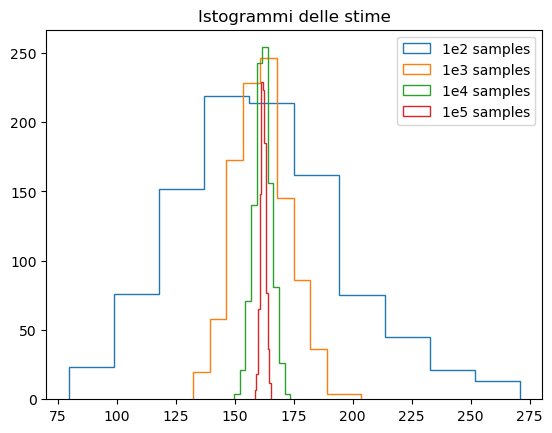

In [38]:
plt.hist(integral[0:1000], histtype='step', label="1e2 samples")
plt.hist(integral[1000:2000], histtype='step', label="1e3 samples")
plt.hist(integral[2000:3000], histtype='step', label="1e4 samples")
plt.hist(integral[3000:4000], histtype='step', label="1e5 samples")
plt.title("Istogrammi delle stime")
plt.legend()
plt.show()

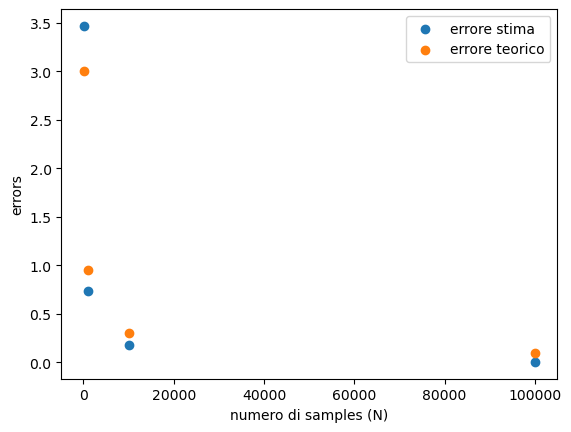

In [40]:
medians=[np.median(integral[0:1000]), np.median(integral[1000:2000]), np.median(integral[2000:3000]), np.median(integral[3000:4000])]
errors=[]
for k in range(len(medians)):
    errors=np.append(errors, np.abs(medians[k]-true_value))

plt.scatter(N, errors, label="errore stima")
plt.scatter(N, 30/np.sqrt(N), label="errore teorico")
plt.xlabel("numero di samples (N)")
plt.ylabel("errors")
plt.legend()
plt.show()

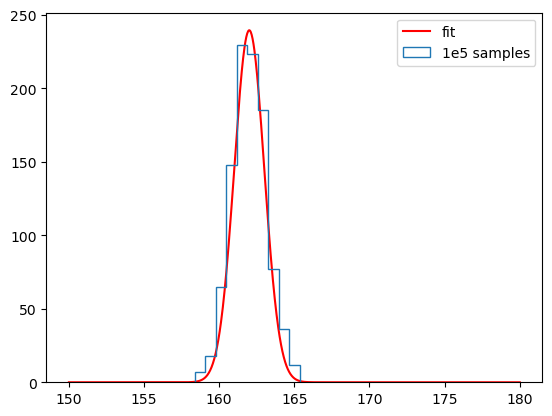

In [43]:
#fit delle stime con 1e5 samples

distG1 = scipy.stats.norm(loc=true_value , scale=1)  
grid=np.linspace(150, 180, 1000)
plt.plot(grid, 600*distG1.pdf(grid), color='red', label="fit")
plt.hist(integral[3000:4000], histtype='step', label="1e5 samples")
plt.legend()
plt.show()


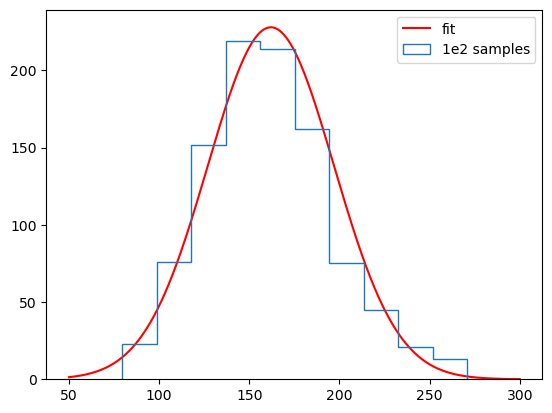

In [44]:
#fit delle stime con 1e2 samples
distG1 = scipy.stats.norm(loc=true_value , scale=35)  
grid=np.linspace(50, 300, 1000)
plt.plot(grid, 20000*distG1.pdf(grid), color='red', label="fit")
plt.hist(integral[0:1000], histtype='step', label="1e2 samples")
plt.legend()
plt.show()